<h1 style='color:blue'>Assignments related to Seaborn using Countries Dataset</h1>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_json("https://restcountries.eu/rest/v2/all")

In [70]:
df.columns

Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'translations',
       'flag', 'regionalBlocs', 'cioc'],
      dtype='object')

In [71]:
# Delete rows where region is empty string 
df.drop(index=df[(df.region == '')].index, inplace=True)

In [160]:
# Create density column for density of population 
df['density'] = df['population'] / df['area']

<h2 style='color:red'>Categorical Plots</h2>

#### Display no. of countries in each region

<AxesSubplot:xlabel='region', ylabel='count'>

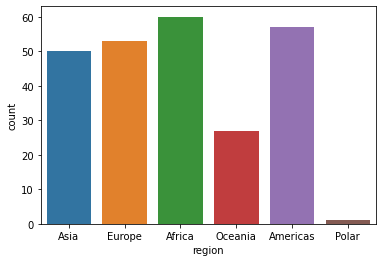

In [293]:
sns.countplot(x = 'region' , data = df)

#### Display total population for each region

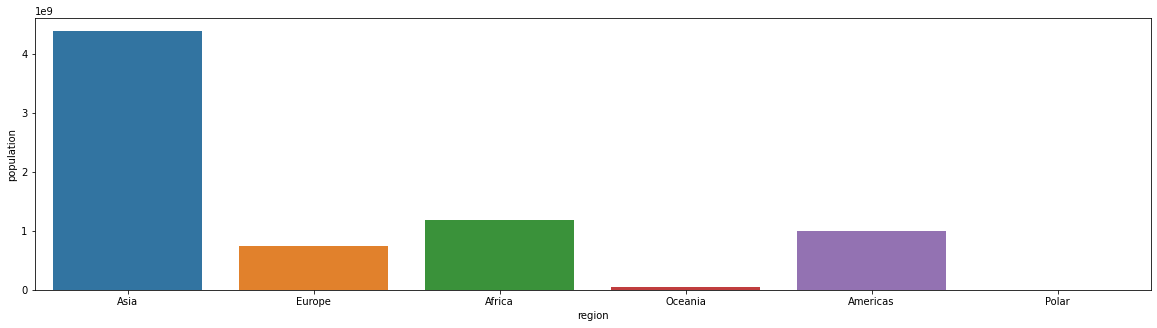

In [156]:
sns.barplot(x = 'region' , y = 'population' , data = df ,ci = False , estimator = sum)
plt.gcf().set_size_inches(20,5)

#### Display population distribution in each region

<AxesSubplot:xlabel='region', ylabel='population'>

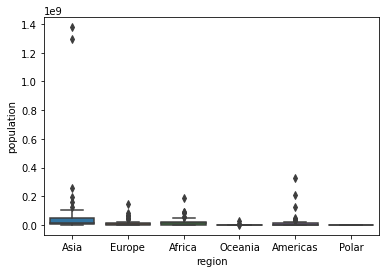

In [137]:
sns.boxplot(x = 'region' , y = 'population' , data = df)

#### Display area distribution in Asia, Europe and Africa without outliers

<AxesSubplot:xlabel='region', ylabel='area'>

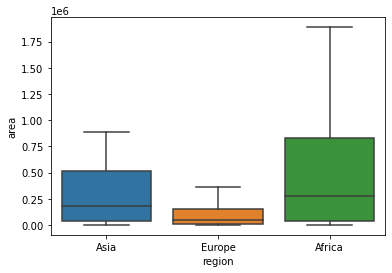

In [149]:
sns.boxplot(x = 'region' , y = 'area' , data = df[df['region'].isin(['Africa' , 'Europe' , 'Asia'])] ,showfliers = False )

#### Display strip plot for population density for each subregion in Asia

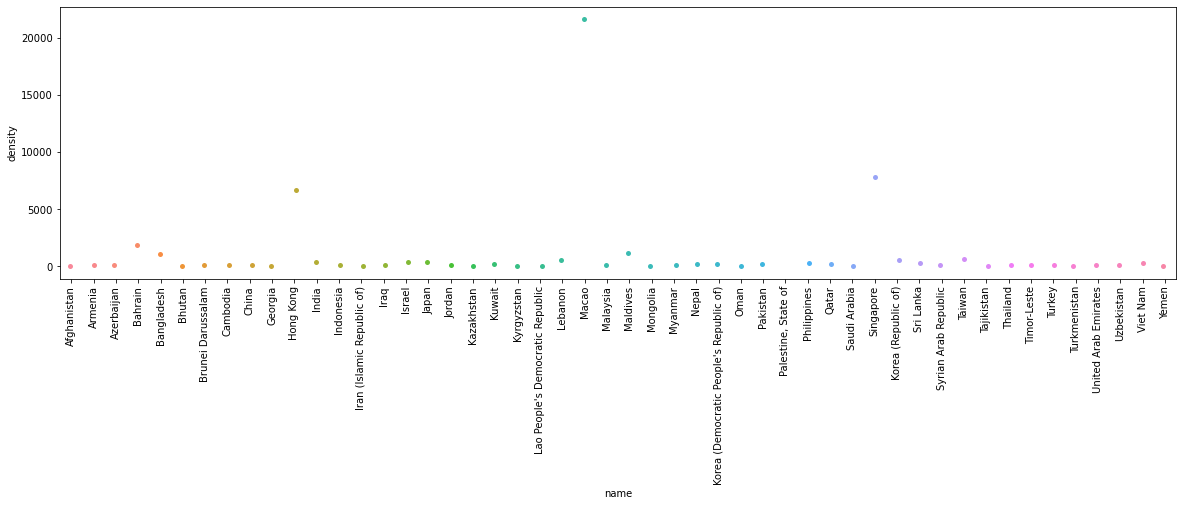

In [173]:
sns.stripplot(x = 'name' , y = 'density' , data = df[df['region'] == 'Asia'] )
plt.gcf().set_size_inches(20,5)
v = plt.xticks(rotation = 90)

#### Display swarm plot for area in each region in Europe

C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Praveen\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.4% of 

<AxesSubplot:xlabel='region', ylabel='area'>

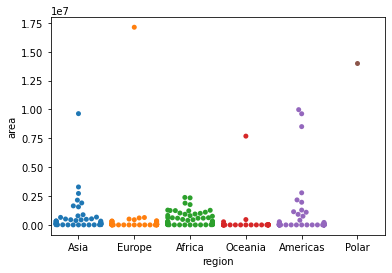

In [150]:
sns.swarmplot(x = 'region' , y = 'area' , data = df)

#### Display swarm plot for area in each region in Europe by excluding Russian Federation

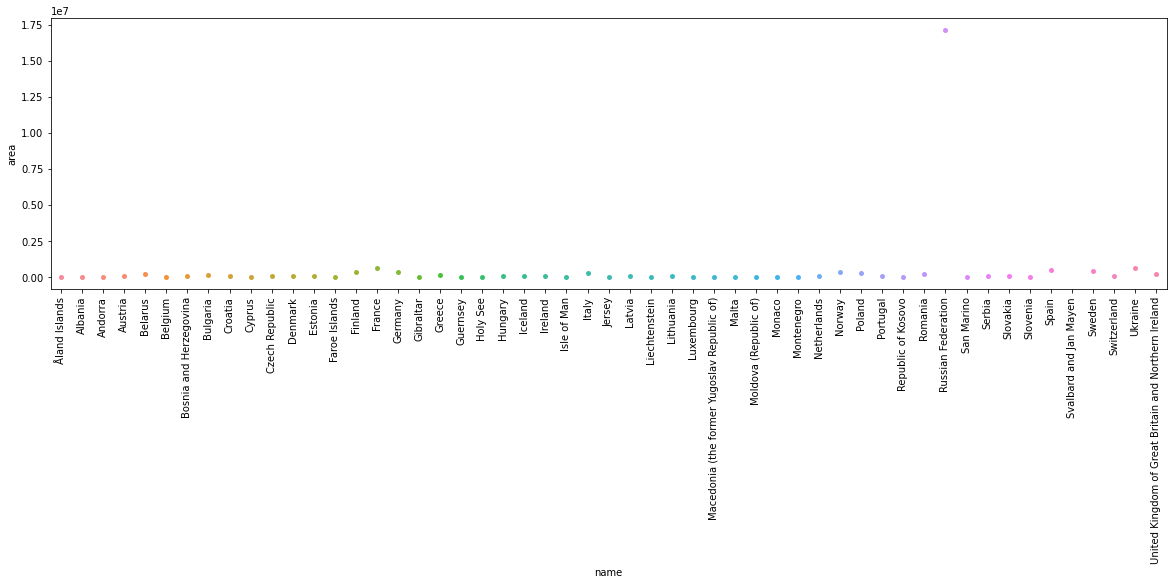

In [289]:
sns.swarmplot(x = 'name' , y = 'area' , data = df[df.region == 'Europe'])
plt.gcf().set_size_inches(20 , 5)
v =plt.xticks(rotation = 90)

## Distribution Plots

#### Draw histogram for population 

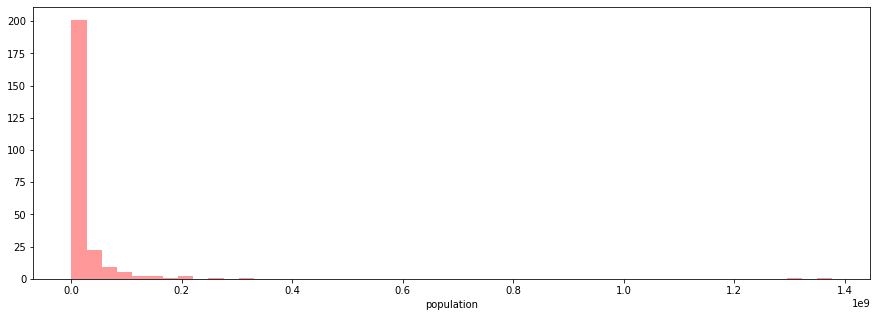

In [182]:
sns.distplot(df.population , color = 'red' , kde = False)
plt.gcf().set_size_inches(15,5)

#### Draw histogram for population with custom bins - 0, 10,00,000, 1,00,00,000, 10,00,00,000, 150,00,00,000

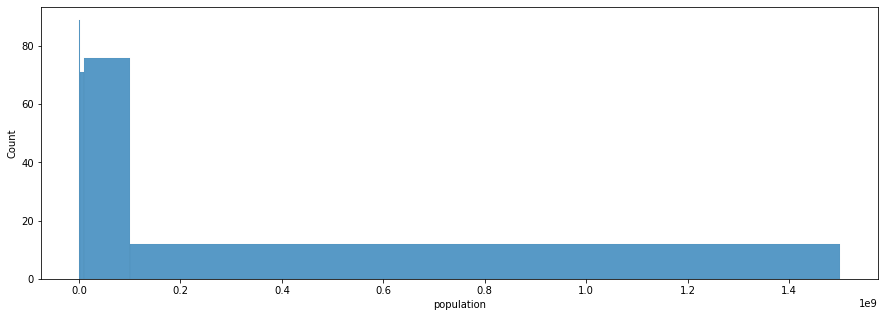

In [191]:
sns.histplot(df.population , bins = [0,1000000, 10000000 , 100000000, 1500000000] , kde = False)
plt.gcf().set_size_inches(15,5)

#### Draw rug plot for population

<AxesSubplot:xlabel='population'>

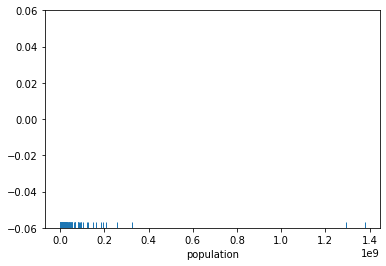

In [192]:
sns.rugplot(x = 'population' , data = df)

## Relational Plots

#### Draw scatter plot for area and population in Africa

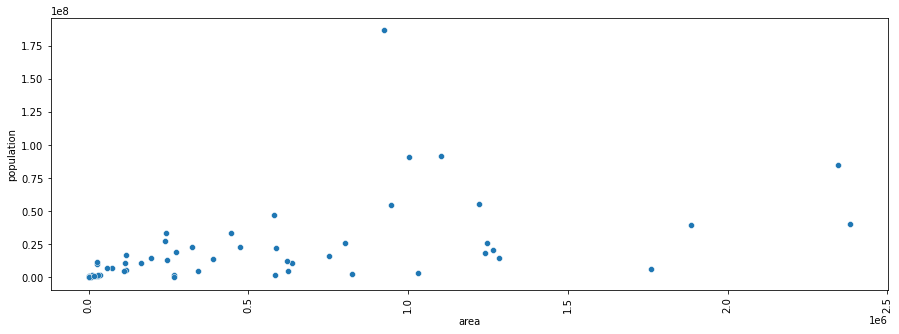

In [198]:
sns.scatterplot(x = 'area' , y = 'population' , data = df[df['region'] == 'Africa'])
plt.gcf().set_size_inches(15,5)
v = plt.xticks(rotation = 90)

#### Draw scatter plot for area and population in Americas and differentiate sub regions 

<AxesSubplot:xlabel='area', ylabel='population'>

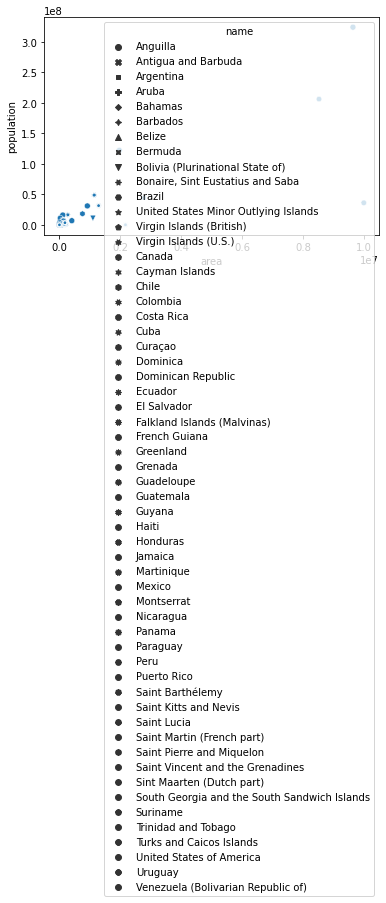

In [279]:
sns.scatterplot(x = 'area' , y = 'population' , data = df[df['region'] == 'Americas'] , style = 'name')

#### Draw multiple scatter plots showing relationship between area and density in each region

<AxesSubplot:xlabel='density', ylabel='area'>

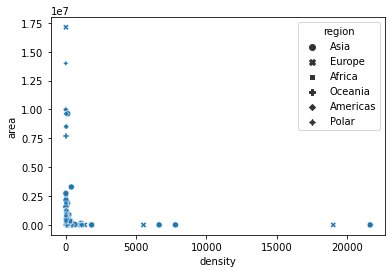

In [278]:
sns.scatterplot(x = 'density' , y = 'area' , data = df , style = 'region')

#### Draw a line plot showing total population in each region in ascending order

<AxesSubplot:xlabel='region', ylabel='population'>

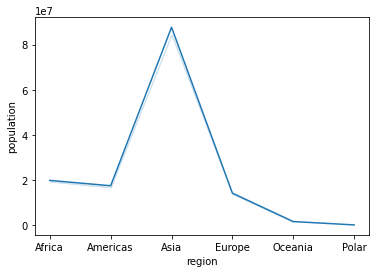

In [213]:
sns.lineplot(x = 'region' , y = 'population' , data = df.sort_values(by = 'region' , ascending = True) , ci = False)

## Regression Plots 

#### Draw regression plot for area and population in Asia

<AxesSubplot:xlabel='area', ylabel='population'>

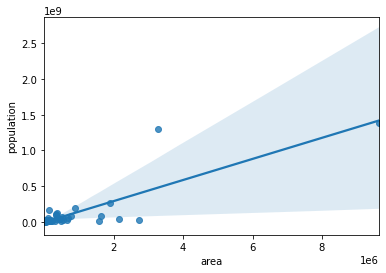

In [228]:
sns.regplot(x = 'area' , y = 'population' , data = df[df.region == 'Asia'] )

#### Draw regression plot for area and population for each subregion in Asia

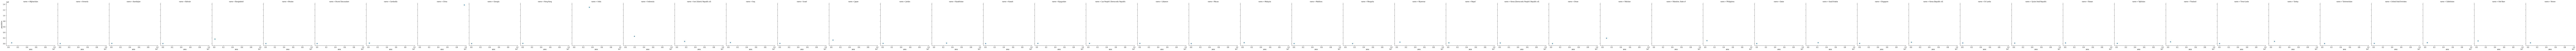

In [235]:
sns.lmplot(x = 'area' , y = 'population' , data = df[df['region'] =='Asia'] , col = 'name' )


## Matrix Plots

#### Draw a heatmap for density in each region

<AxesSubplot:ylabel='region'>

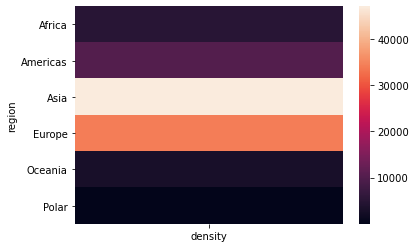

In [248]:
data = df.pivot_table(index = 'region' , values = 'density' ,aggfunc = np.sum)
sns.heatmap(data)

**Types**:
* Categorical Plot:    
catplot()
barplot()
countplot()
* Distribution Plot:
jointplot()
pairplot()
histplot()
distplot()
* Relational Plot:
scatterplot()
lineplot()
relplot()
* Regression Plot:
regplot()
lmplot()
* matrix plot:
heatplot()
